<a href="https://colab.research.google.com/github/Tgoutam/skills-introduction-to-github/blob/main/Exploratory%20DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q: Give an advanced example of AI doing exploratory data analysis(EDA) on data from a Kaggle source dataset using Python. Please note that the Kaggle data-set would need to be accessed from Jupyter notebook running in Google COLAB

ChatGPT:


Let's create an advanced example of Exploratory Data Analysis (EDA) on a Kaggle dataset using Python in a Jupyter notebook running in Google Colab. For this example, we'll use the Titanic dataset, which is a well-known dataset available on Kaggle. Here's a step-by-step guide:

Set Up Environment and Import Libraries:

First, we need to install and import the necessary libraries. We also need to set up Kaggle credentials to download the dataset directly.


In [ ]:
# Install necessary libraries
!pip install kaggle pandas matplotlib seaborn missingno

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Set plot style
sns.set(style="whitegrid")

# Ensure that Kaggle API credentials are set up
from google.colab import files
files.upload()  # Upload the kaggle.json file here

# Make directory for Kaggle and move kaggle.json there
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download the Titanic dataset from Kaggle
!kaggle competitions download -c titanic

# Unzip the dataset
!unzip titanic.zip


Saving kaggle.json to kaggle.json
titanic.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  titanic.zip
replace gender_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: gender_submission.csv   
replace test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: test.csv                
replace train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train.csv               


Load the Dataset:

Load the dataset into a pandas DataFrame.

In [ ]:
# Load the dataset
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Display the first few rows of the training set
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Initial Data Exploration:

Let's start with basic information about the dataset.

In [ ]:
# Basic information about the dataset
train_df.info()

# Statistical summary of the dataset
train_df.describe(include='all')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Handling Missing Data:

Identify and visualize missing data.

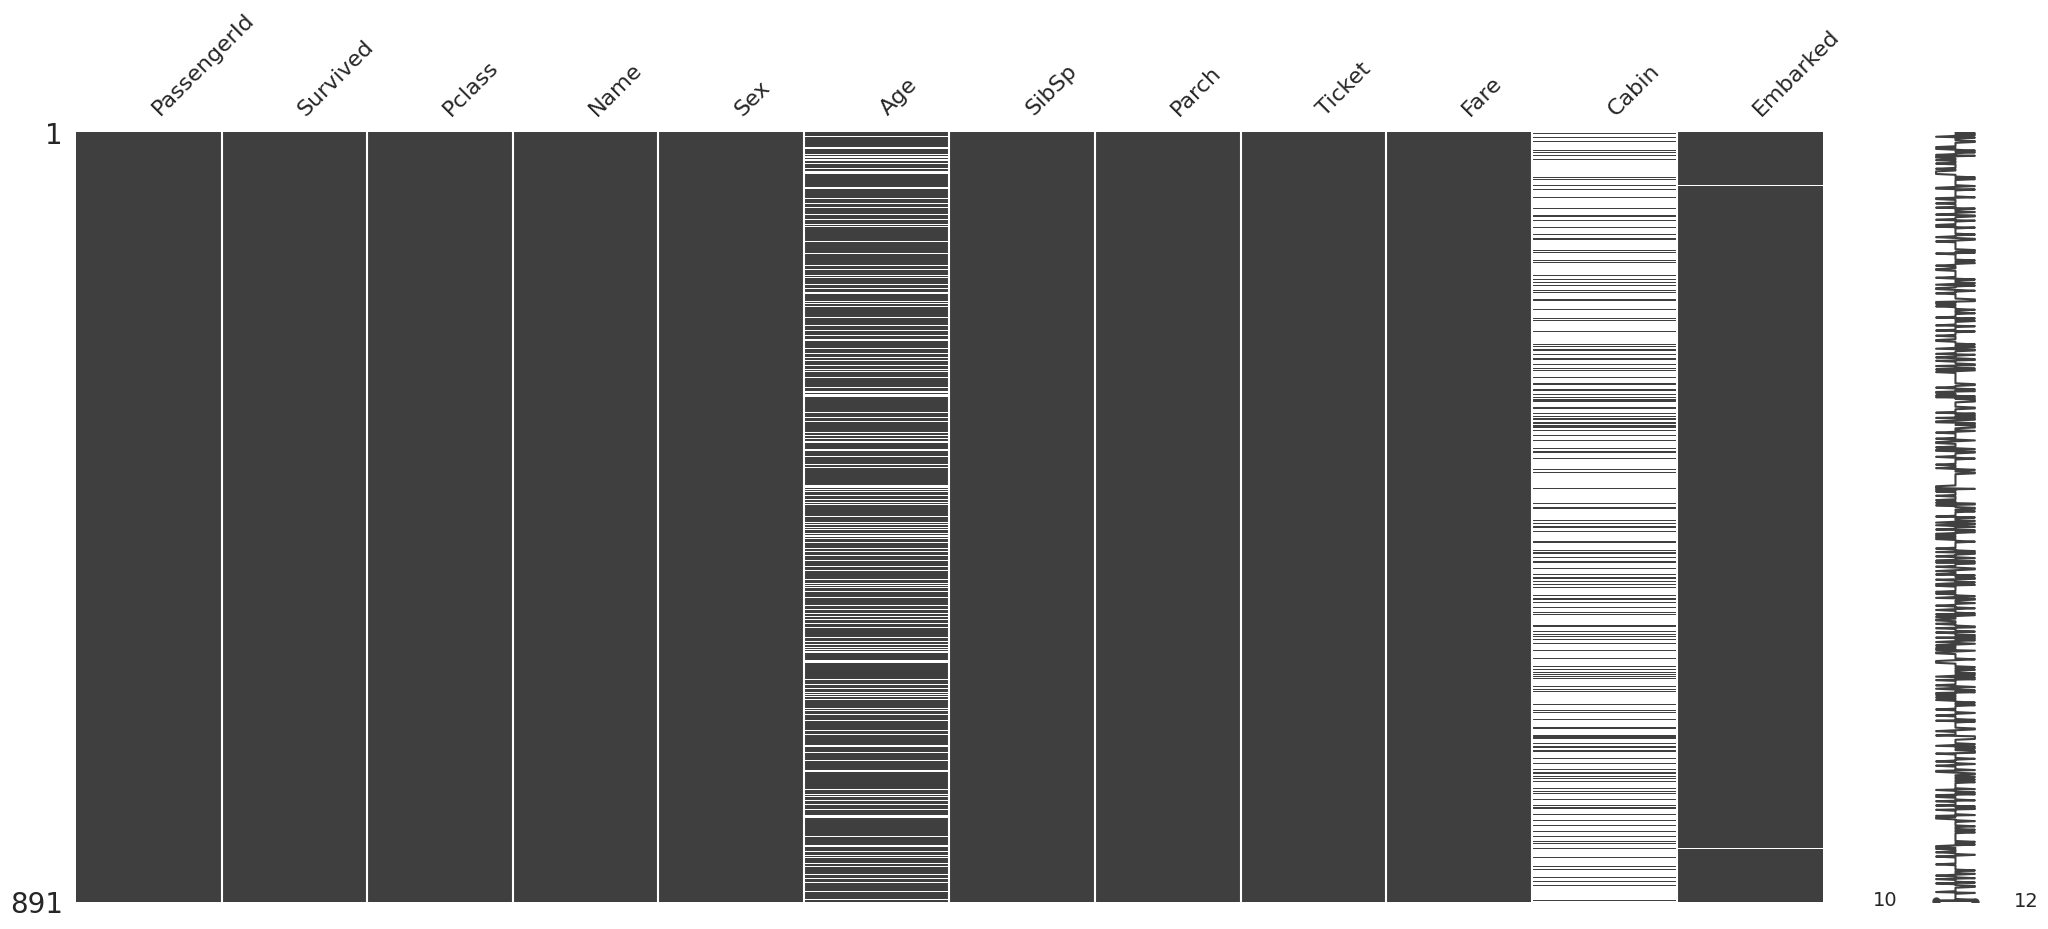

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# Visualize missing data
msno.matrix(train_df)
plt.show()

# Display the number of missing values for each column
train_df.isnull().sum()


Data Cleaning:

Fill missing values for 'Age' with the median, and for 'Embarked' with the mode. For 'Cabin', we'll create a new feature indicating whether a cabin number is available or not.

In [ ]:
# Fill missing 'Age' values with the median
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)

# Fill missing 'Embarked' values with the mode
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

# Create a new feature 'Has_Cabin' and drop the original 'Cabin' column
train_df['Has_Cabin'] = train_df['Cabin'].apply(lambda x: 0 if pd.isna(x) else 1)
train_df.drop(['Cabin'], axis=1, inplace=True)


Feature Engineering:

Create new features and transform existing ones to enhance the dataset.

In [ ]:
# Extract titles from the 'Name' column
train_df['Title'] = train_df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

# Simplify titles
train_df['Title'] = train_df['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',
                                               'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
train_df['Title'] = train_df['Title'].replace('Mlle', 'Miss')
train_df['Title'] = train_df['Title'].replace('Ms', 'Miss')
train_df['Title'] = train_df['Title'].replace('Mme', 'Mrs')

# Convert 'Sex' and 'Embarked' to numerical values
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1}).astype(int)
train_df['Embarked'] = train_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

# Create a new feature 'FamilySize'
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1

# Drop unnecessary columns
train_df.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)


Exploratory Data Analysis:

Perform in-depth analysis and visualizations.

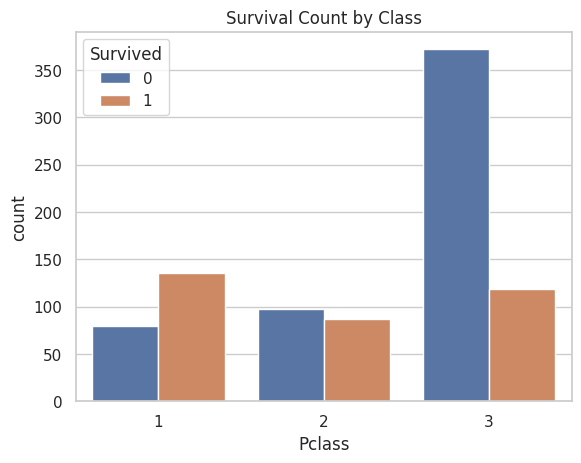

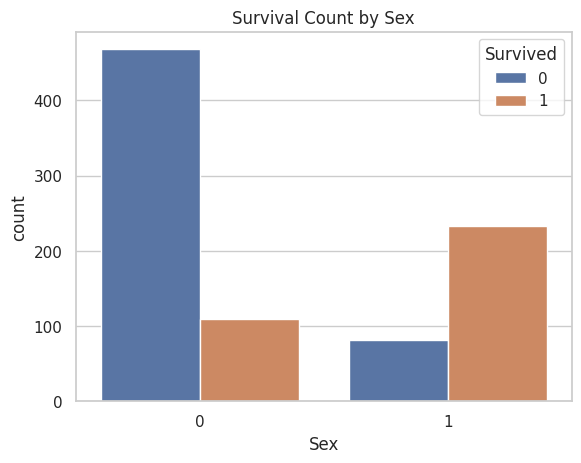

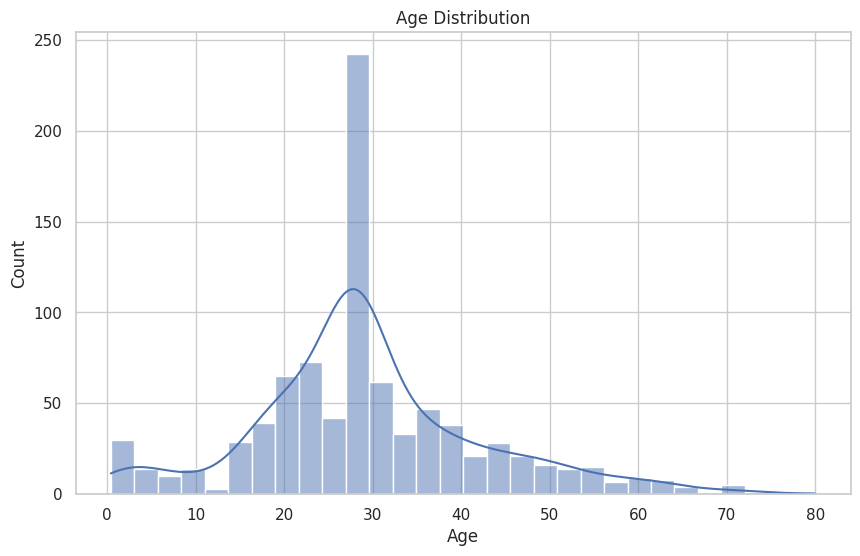

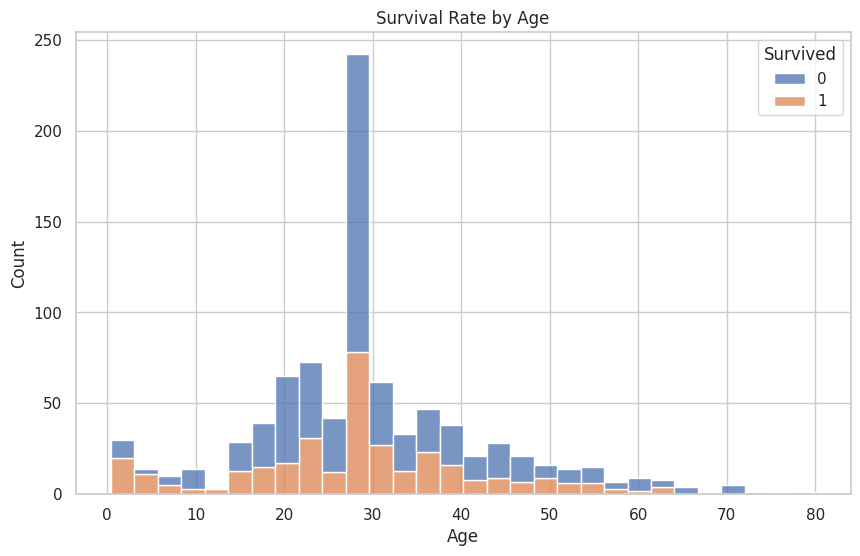

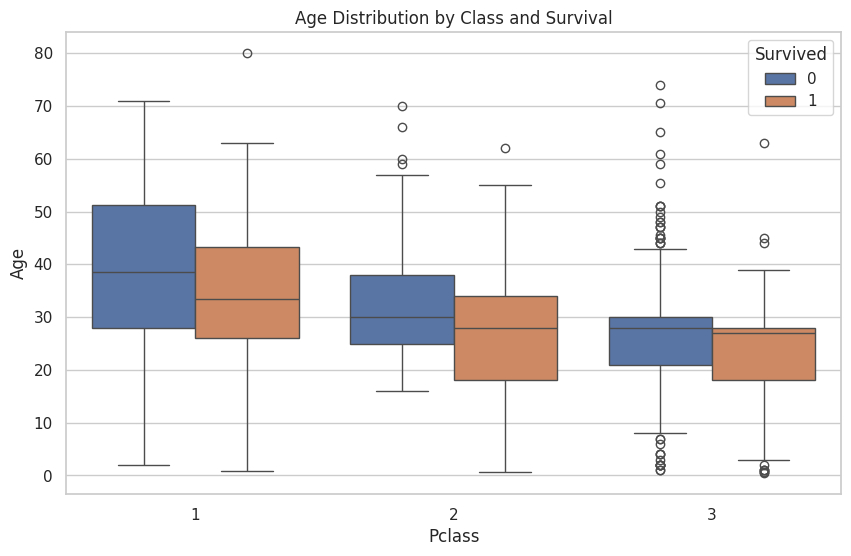

In [ ]:
# Correlation heatmap
# plt.figure(figsize=(12, 8))
# sns.heatmap(train_df.corr(), annot=True, fmt=".2f")
# plt.show()

# Distribution of survival by class
sns.countplot(x='Pclass', hue='Survived', data=train_df)
plt.title('Survival Count by Class')
plt.show()

# Distribution of survival by sex
sns.countplot(x='Sex', hue='Survived', data=train_df)
plt.title('Survival Count by Sex')
plt.show()

# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

# Survival rate by age
plt.figure(figsize=(10, 6))
sns.histplot(data=train_df, x='Age', hue='Survived', multiple='stack', bins=30)
plt.title('Survival Rate by Age')
plt.show()

# Boxplot of Age by Pclass and Survived
plt.figure(figsize=(10, 6))
sns.boxplot(x='Pclass', y='Age', hue='Survived', data=train_df)
plt.title('Age Distribution by Class and Survival')
plt.show()


Advanced Visualizations:

Use more advanced visualization techniques to gain deeper insights.

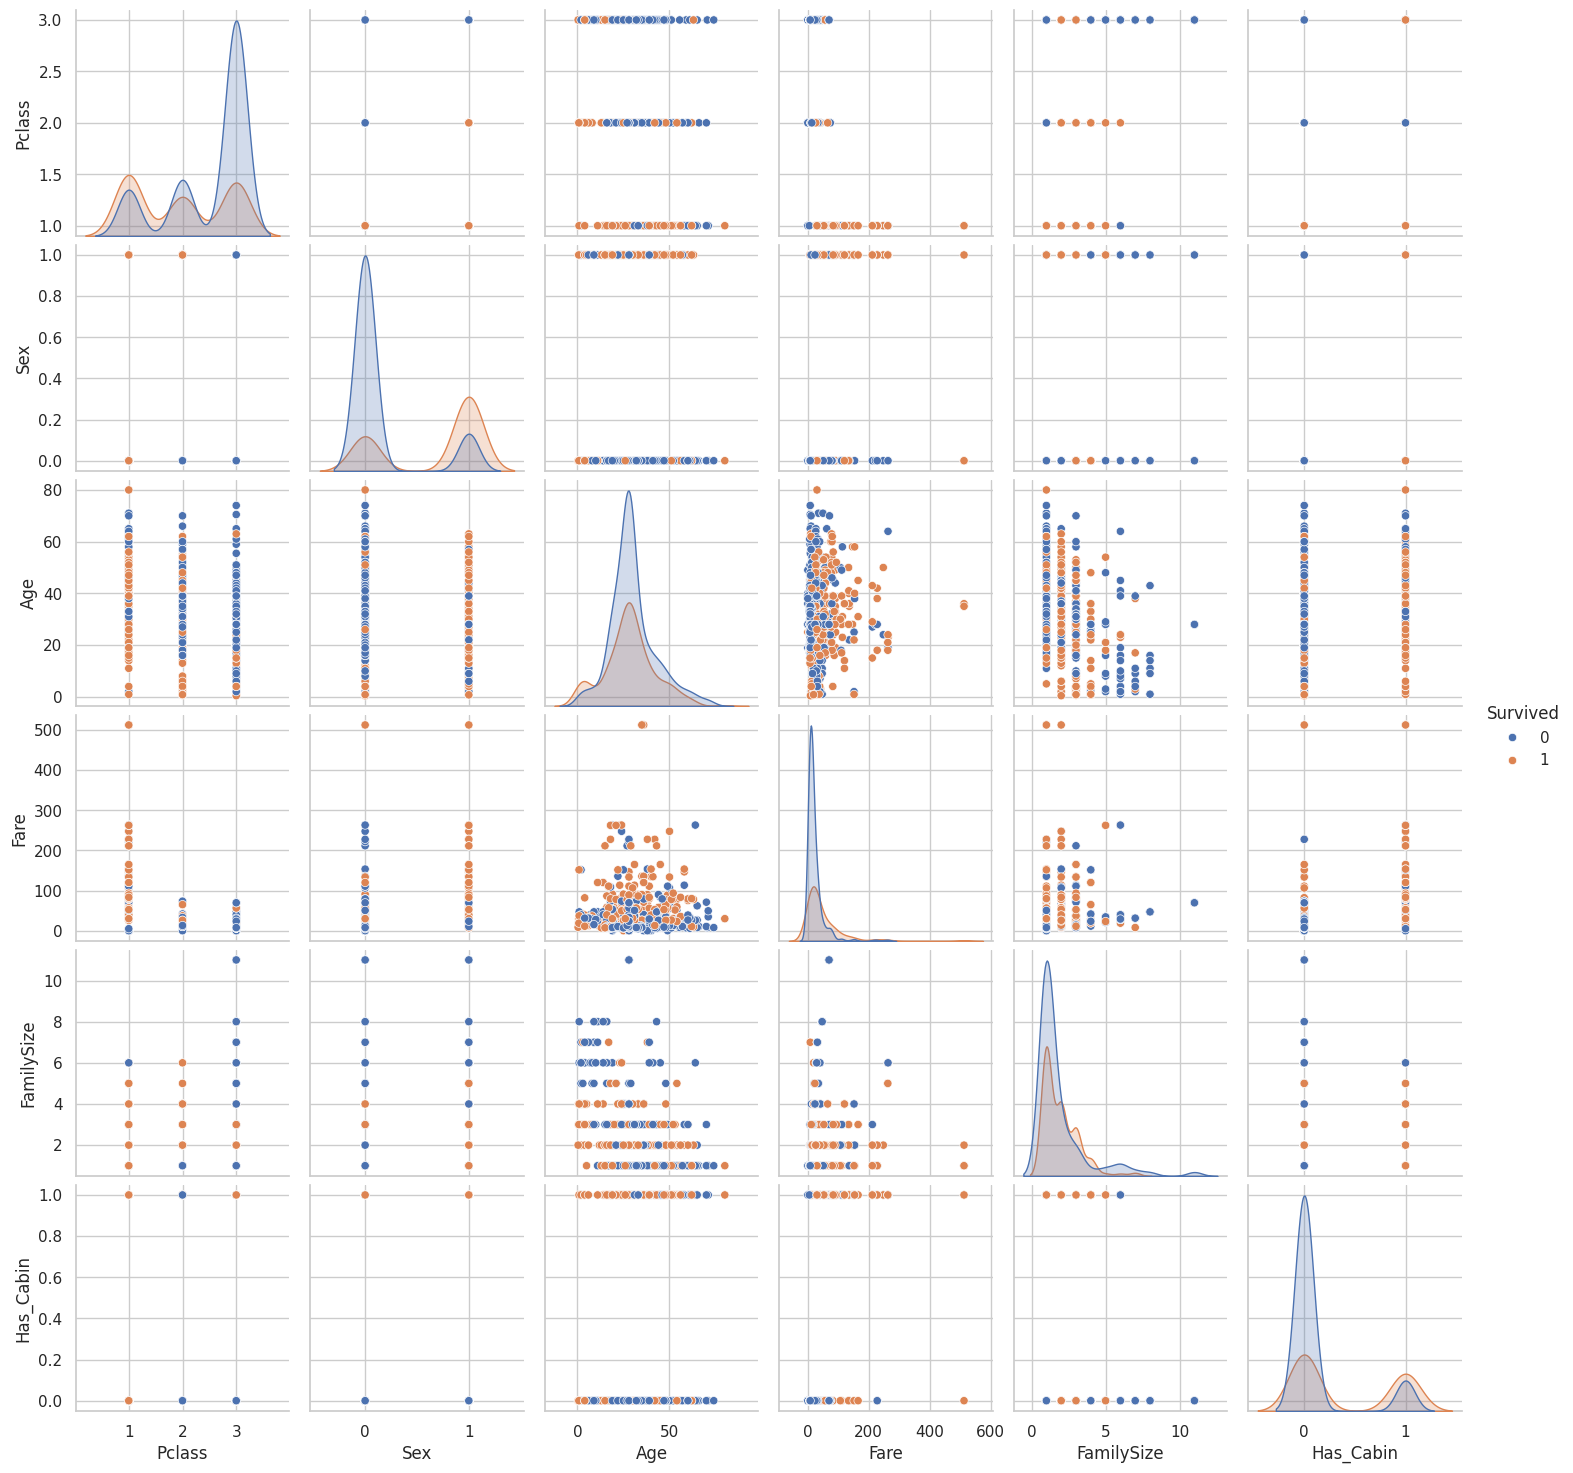

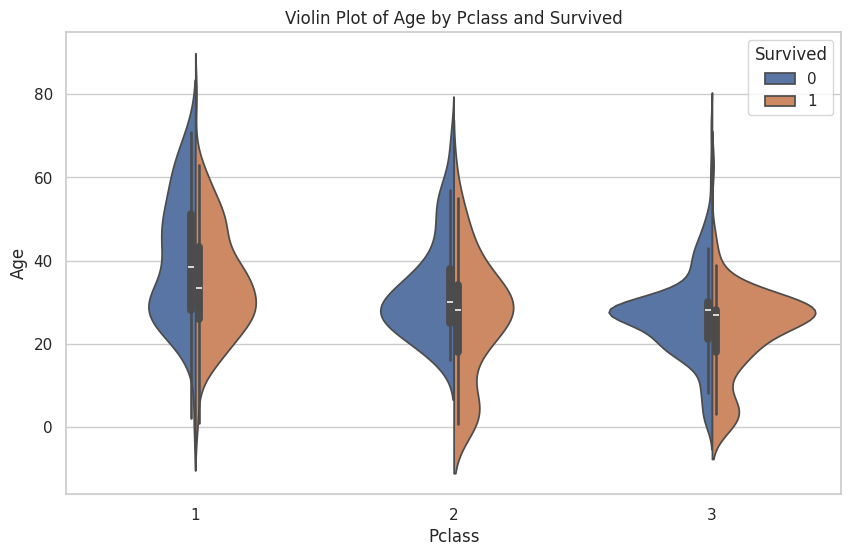

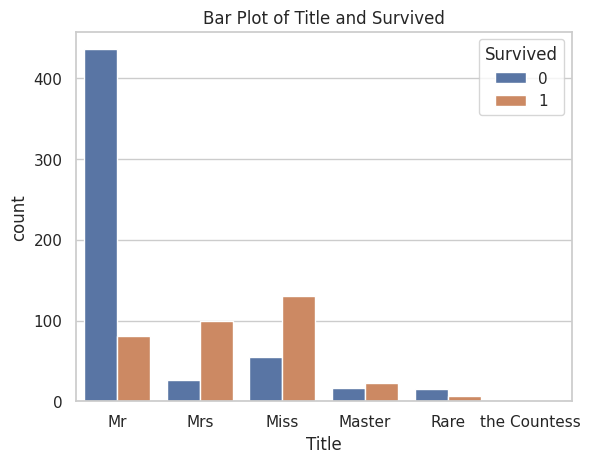

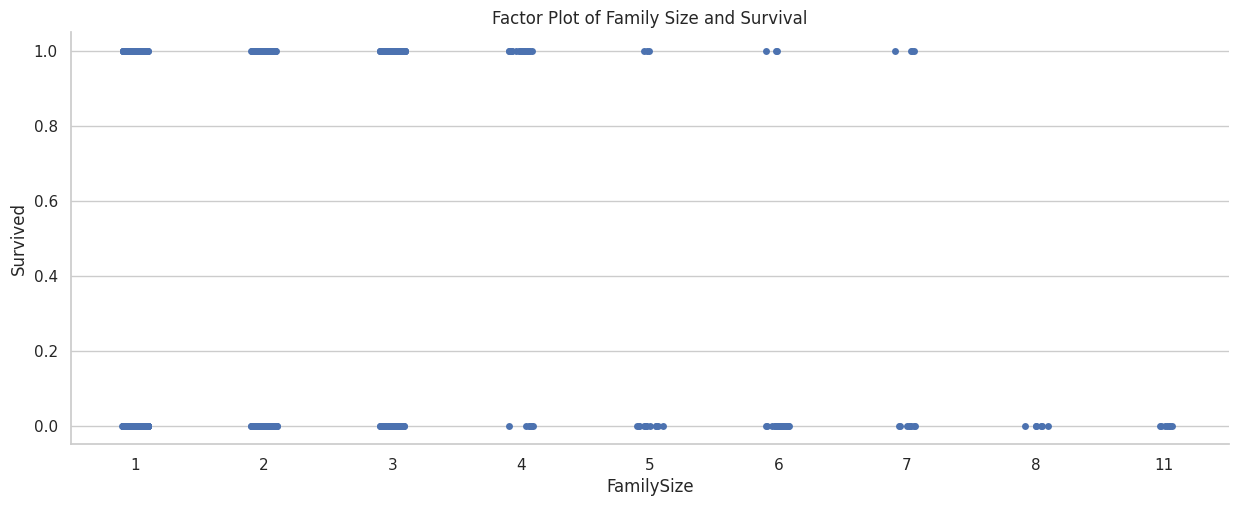

In [ ]:
# Pairplot to see relationships between features
sns.pairplot(train_df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'FamilySize', 'Has_Cabin', 'Title']],
             hue='Survived', diag_kind='kde')
plt.show()

# Violin plot for Age, Pclass, and Survived
plt.figure(figsize=(10, 6))
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=train_df, split=True)
plt.title('Violin Plot of Age by Pclass and Survived')
plt.show()

# Bar plot for Title and Survived
sns.countplot(x='Title', hue='Survived', data=train_df)
plt.title('Bar Plot of Title and Survived')
plt.show()
# Factor plot for FamilySize and Survived
sns.catplot(x='FamilySize', y='Survived', data=train_df, aspect=2.5)
plt.title('Factor Plot of Family Size and Survival')
plt.show()


Insights and Conclusions:

Summarize the key insights and potential next steps for model building.

# Insights and Conclusions

1. **Correlation Analysis**:
   - High correlation between 'Fare' and 'Pclass', as expected.
   - 'Sex' and 'Pclass' are strongly correlated with survival.

2. **Class and Survival**:
   - Higher survival rate in 1st class compared to 2nd and 3rd classes.

3. **Gender and Survival**:
   - Females have a significantly higher survival rate than males.

4. **Age Distribution**:
   - Younger passengers had higher survival rates.
   - Infants and children had a much higher chance of survival.

5. **Family Size**:
   - Passengers with a family size of 1-3 had higher survival rates.
   - Larger families had lower survival rates.

6. **Cabin Information**:
   - Passengers with cabin information had higher survival rates.

# Next Steps
1. **Model Building**:
   - Use features like 'Pclass', 'Sex', 'Age', 'Fare', 'FamilySize', 'Title', and 'Has_Cabin' for predictive modeling.
   - Consider feature engineering and scaling.

2. **Model Evaluation**:
   - Evaluate different models like Logistic Regression, Decision Trees, Random Forest, and Gradient Boosting.
   - Perform hyperparameter tuning to improve model performance.

3. **Cross-Validation**:
   - Use cross-validation techniques to ensure model robustness.

4. **Ensemble Methods**:
   - Explore ensemble methods to combine multiple models for better performance.
